In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

#from matplotlib.cm import rainbow
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
os.chdir('/content/drive/My Drive/ML')
os.listdir('.')
file_exists = os.path.isfile('winequality-white.csv')
file_exists

TypeError: ignored

In [ ]:
df_wine = 'winequality-white.csv'
df_wine = pd.read_csv('/content/drive/My Drive/ML/winequality-white.csv',delimiter=';')
df_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df_wine.isnull().sum().sort_values()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51bfa1eba8>,
      dtype=object)

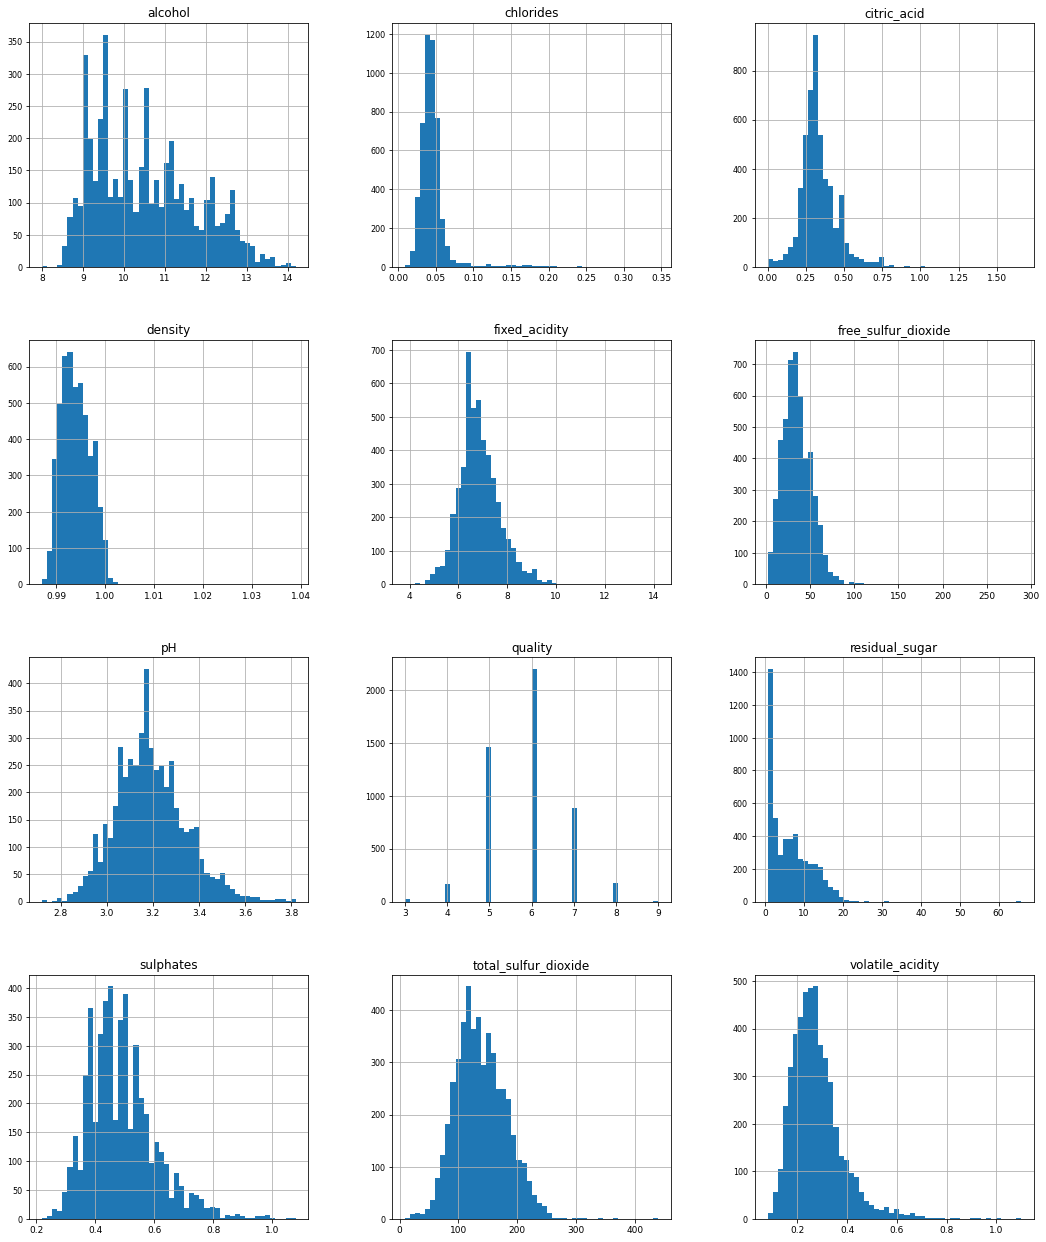

In [ ]:
df_wine.hist(figsize=(18, 22), bins=50, xlabelsize=9, ylabelsize=8)

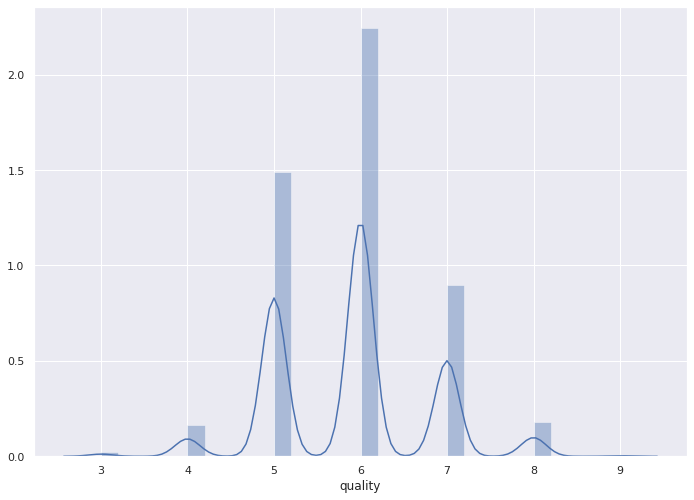

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_wine['quality'], bins=30)
plt.show()


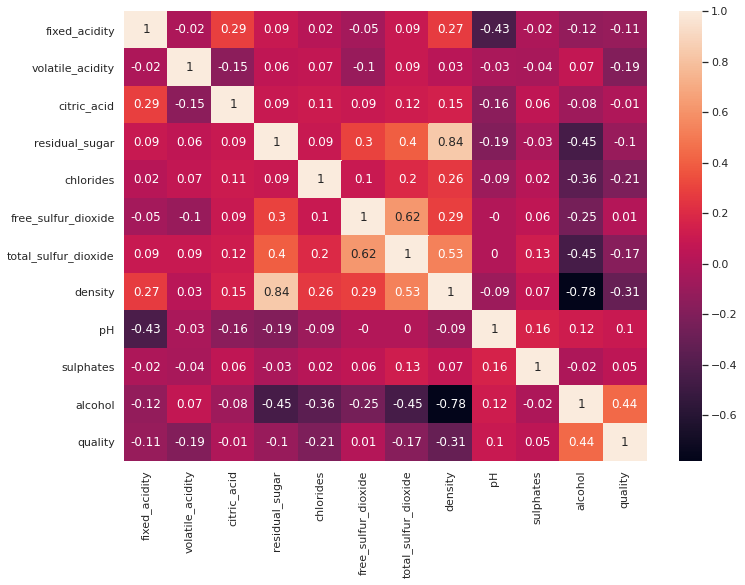

In [ ]:
correlation_matrix = df_wine.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
standardscaler = preprocessing.StandardScaler()
feature = df_wine.drop(['quality'], axis = 1)
label = df_wine['quality']

feature_standardscaler = standardscaler.fit_transform(feature.values)
label_standardscaler = standardscaler.fit_transform(df_wine['quality'].values.reshape(-1,1)).flatten()
feature_train, feature_test, label_train, label_test = train_test_split(feature_standardscaler, label_standardscaler, test_size = 0.25, random_state = 10)

line = LinearRegression()
line.fit(feature_train, label_train)
predict = line.predict(feature_test)

mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE Standard Scaler :', mse)
print('MAE Standard Scaler :',  mae)
print('R2 Standard Scaler  :', r2)
print('RMSE Standard Scaler:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Standard Scaler : 0.7075828231559514
MAE Standard Scaler : 0.655443475061489
R2 Standard Scaler  : 0.2894540453148069
RMSE Standard Scaler: 0.8411794238781352


In [ ]:
jon = PowerTransformer(method='yeo-johnson', standardize=True)

feature_jon = jon.fit_transform(feature.values)
label_jon = jon.fit_transform(df_wine['quality'].values.reshape(-1,1)).flatten()
feature_train_jon, feature_test_jon, label_train_jon, label_test_jon = train_test_split(feature_jon, label_jon, test_size = 0.25, random_state = 10)

line_jon = LinearRegression()
line_jon.fit(feature_train_jon, label_train_jon)
predict_jon = line_jon.predict(feature_test_jon)
mse = mean_squared_error(label_test_jon, predict_jon)
mae = mean_absolute_error(label_test_jon, predict_jon)
r2 = r2_score(label_test_jon, predict_jon)

In [ ]:
print('MSE Yeo Jhonson :', mse)
print('MAE Yeo Jhonson :',  mae)
print('R2 Yeo Jhonson  :', r2)
print('RMSE Yeo Jhonson:', np.sqrt(mean_squared_error(label_test_jon, predict_jon)))

MSE Yeo Jhonson : 0.6976934820799373
MAE Yeo Jhonson : 0.6528074660722069
R2 Yeo Jhonson  : 0.29297304259001833
RMSE Yeo Jhonson: 0.8352804810840113


In [ ]:
box = PowerTransformer(method='box-cox', standardize=True)

feature_box = box.fit_transform(feature.values)
label_box = box.fit_transform(df_wine['quality'].values.reshape(-1,1)).flatten()


ValueError: ignored

In [ ]:
q = QuantileTransformer()

feature_q = q.fit_transform(feature.values)
label_q = q.fit_transform(df_wine['quality'].values.reshape(-1,1)).flatten()
feature_train_q, feature_test_q, label_train_q, label_test_q = train_test_split(feature_q, label_q, test_size = 0.25, random_state = 10)

line_q = LinearRegression()
line_q.fit(feature_train_q, label_train_q)
predict_q = line_q.predict(feature_test_q)
mse = mean_squared_error(label_test_q, predict_q)
mae = mean_absolute_error(label_test_q, predict_q)
r2 = r2_score(label_test_q, predict_q)

In [ ]:
print('MSE Quantile :', mse)
print('MAE Quantile :',  mae)
print('R2 Quantile  :', r2)
print('RMSE Quantile:', np.sqrt(mean_squared_error(label_test_q, predict_q)))

MSE Quantile : 0.050497640871350474
MAE Quantile : 0.18710062337488195
R2 Quantile  : 0.3153358837239174
RMSE Quantile: 0.22471680148878603


In [ ]:
min = MinMaxScaler()
feature_min = min.fit_transform(feature.values)
label_min = min.fit_transform(df_wine['quality'].values.reshape(-1,1)).flatten()
feature_train_min, feature_test_min, label_train_min, label_test_min = train_test_split(feature_min, label_min, test_size = 0.25, random_state = 10)

line_min = LinearRegression()
line_min.fit(feature_train_min, label_train_min)
predict_min = line_min.predict(feature_test_min)
mse = mean_squared_error(label_test_min, predict_min)
mae = mean_absolute_error(label_test_min, predict_min)
r2 = r2_score(label_test_min, predict_min)

In [ ]:
print('MSE Min Max Scaler :', mse)
print('MAE Min Max Scaler :',  mae)
print('R2 Min Max Scaler  :', r2)
print('RMSE Min Max Scaler:', np.sqrt(mean_squared_error(label_test_min, predict_min)))

MSE Min Max Scaler : 0.015413424983898676
MAE Min Max Scaler : 0.09673779412432354
R2 Min Max Scaler  : 0.2894540453148059
RMSE Min Max Scaler: 0.12415081547818635


In [ ]:
max = MaxAbsScaler()
feature_max = max.fit_transform(feature.values)
label_max = max.fit_transform(df_wine['quality'].values.reshape(-1,1)).flatten()
feature_train_max, feature_test_max, label_train_max, label_test_max = train_test_split(feature_max, label_max, test_size = 0.25, random_state = 10)

line_max = LinearRegression()
line_max.fit(feature_train_max, label_train_max)
predict_max = line_max.predict(feature_test_max)
mse = mean_squared_error(label_test_max, predict_max)
mae = mean_absolute_error(label_test_max, predict_max)
r2 = r2_score(label_test_max, predict_max)

In [ ]:
print('MSE Max Abs Scaler :', mse)
print('MAE Max Abs Scaler :',  mae)
print('R2 Max Abs Scaler  :', r2)
print('RMSE Max Abs Scalerr:', np.sqrt(mean_squared_error(label_test_max, predict_max)))

MSE Max Abs Scaler : 0.006850411103954908
MAE Max Abs Scaler : 0.06449186274954917
R2 Max Abs Scaler  : 0.289454045314812
RMSE Max Abs Scalerr: 0.08276721031879054


In [ ]:
robust = RobustScaler()
feature_robust = robust.fit_transform(feature.values)
label_robust = robust.fit_transform(df_wine['quality'].values.reshape(-1,1)).flatten()
feature_train_robust, feature_test_robust, label_train_robust, label_test_robust = train_test_split(feature_robust, label_robust, test_size = 0.25, random_state = 10)

line_robust = LinearRegression()
line_robust.fit(feature_train_robust, label_train_robust)
predict_robust = line_robust.predict(feature_test_robust)
mse = mean_squared_error(label_test_robust, predict_robust)
mae = mean_absolute_error(label_test_robust, predict_robust)
r2 = r2_score(label_test_robust, predict_robust)

In [ ]:
print('MSE Robust Scaler :', mse)
print('MAE Robust Scaler :',  mae)
print('R2 Robust Scaler  :', r2)
print('RMSE Robust Scaler:', np.sqrt(mean_squared_error(label_test_robust, predict_robust)))

MSE Robust Scaler : 0.5548832994203519
MAE Robust Scaler : 0.5804267647459413
R2 Robust Scaler  : 0.2894540453148067
RMSE Robust Scaler: 0.7449048928691178


In [ ]:
rf = RandomForestRegressor(n_estimators = 1000 )
rf.fit(feature_train, label_train)
predict = rf.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE Random Forest :', mse)
print('MAE Random Forest :',  mae)
print('R2 Random Forest  :', r2)
print('RMSE Random Forest:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Random Forest : 0.44566651863454315
MAE Random Forest : 0.48547169967119225
R2 Random Forest  : 0.5524671719106804
RMSE Random Forest: 0.6675825931182922


In [ ]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(feature_train, label_train)
predict = knn.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE Random Forest :', mse)
print('MAE Random Forest :',  mae)
print('R2 Random Forest  :', r2)
print('RMSE Random Forest:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Random Forest : 0.6628685864748763
MAE Random Forest : 0.5853632462739243
R2 Random Forest  : 0.3343555309795765
RMSE Random Forest: 0.8141674191926844


In [ ]:
svr = SVR(kernel = 'rbf')
svr.fit(feature_train, label_train)
predict = svr.predict(feature_test)
mse_svr = mean_squared_error(label_test, predict_svr)
mae_svr = mean_absolute_error(label_test, predict_svr)
r2_svr = r2_score(label_test, predict_svr)

In [ ]:
print('MSE Random Forest :', mse_svr)
print('MAE Random Forest :',  mae_svr)
print('R2 Random Forest  :', r2_svr)
print('RMSE Random Forest:', np.sqrt(mean_squared_error(label_test, predict_svr)))

MSE Random Forest : 0.6071009432580882
MAE Random Forest : 0.5896996410185582
R2 Random Forest  : 0.390356711326605
RMSE Random Forest: 0.7791668263331597
